1.	Data Acquistion - OK
2.	Exploratory data analysis Analysis 
2.1.	Statistical data analysis - OK
2.2.	Investigating Outliers - OK
2.3.	Investigating Missing Values - OK
3.	Data Preprocessing
3.1.	Timeseries Missing Value Treatment - No missing values
3.2.	Timeseries Outliers handling - Couldn't make it
3.3.	Convert timestemps and dataset index - OK
4.	Most correlated columns Variables Selection - OK
5.	Data Transformation... - Not sure about this

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
from histograms import histograms


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn import datasets
from sklearn.datasets import make_classification

C:\ProgramData\Anaconda3\lib\site-packages\histograms\utils.py:6: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import MultiIndex


In [3]:
ff_dataset = pd.read_csv("Unilever_2003-2013.CSV");
ff_dataset.head()

Date    Open    High     Low   Close    Adj Close    Volume
0  2003-09-03  3075.0  3375.0  3025.0  3375.0  2167.930664   8632500
1  2003-09-04  3450.0  3750.0  3375.0  3425.0  2200.048096  16570000
2  2003-09-05  3425.0  3500.0  3400.0  3450.0  2216.106934   4811000
3  2003-09-08  3450.0  3450.0  3325.0  3400.0  2183.989990   3601500
4  2003-09-09  3400.0  3400.0  3300.0  3325.0  2135.813477   2815000

In [4]:
ff_dataset.tail()

Date     Open     High      Low    Close     Adj Close   Volume
3310  2017-04-21  45300.0  45600.0  44500.0  45525.0  45093.214844  1210200
3311  2017-04-25  45525.0  45525.0  45100.0  45300.0  44870.351563  1216000
3312  2017-04-26  44800.0  45800.0  44675.0  45800.0  45365.609375  2002300
3313  2017-04-27  45775.0  45800.0  45225.0  45750.0  45316.082031  1966800
3314  2017-04-28  45400.0  45400.0  44325.0  44500.0  44077.937500  1896100

In [5]:
ff_dataset.describe()

Open          High           Low         Close     Adj Close  \
count   3315.000000   3315.000000   3315.000000   3315.000000   3315.000000   
mean   17761.258220  17975.980995  17545.765913  17770.579487  16159.530840   
std    13600.095739  13745.474159  13445.660251  13605.519493  13564.126327   
min       49.000000     50.000000     49.000000     49.000000     37.319904   
25%     5775.000000   5850.000000   5700.000000   5775.000000   4406.032714   
50%    14900.000000  15050.000000  14800.000000  14900.000000  12794.589844   
75%    29575.000000  29975.000000  29200.000000  29550.000000  27417.013672   
max    47800.000000  47800.000000  46025.000000  47800.000000  46926.152344   

             Volume  
count  3.315000e+03  
mean   1.558793e+06  
std    2.110830e+06  
min    0.000000e+00  
25%    2.645000e+05  
50%    1.210200e+06  
75%    2.011200e+06  
max    3.878650e+07

In [6]:
ff_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3315 entries, 0 to 3314
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3315 non-null   object 
 1   Open       3315 non-null   float64
 2   High       3315 non-null   float64
 3   Low        3315 non-null   float64
 4   Close      3315 non-null   float64
 5   Adj Close  3315 non-null   float64
 6   Volume     3315 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 181.4+ KB


In [7]:
ff_dataset.shape

(3315, 7)

In [8]:
ff_dataset.nunique()
ff_dataset['Date'].unique()

array(['2003-09-03', '2003-09-04', '2003-09-05', ..., '2017-04-26',
       '2017-04-27', '2017-04-28'], dtype=object)

Identifying NULL Values

In [9]:
ff_dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Duplicate Values


In [10]:
duplicate = ff_dataset.duplicated()
print("Total duplicated: ", duplicate.sum())
ff_dataset[duplicate]

Total duplicated:  0


Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

Correlation

In [11]:
correlation = ff_dataset.corr()

Text(0.5, 1.0, 'Seaborn heatmap - Correlation between all Variables')

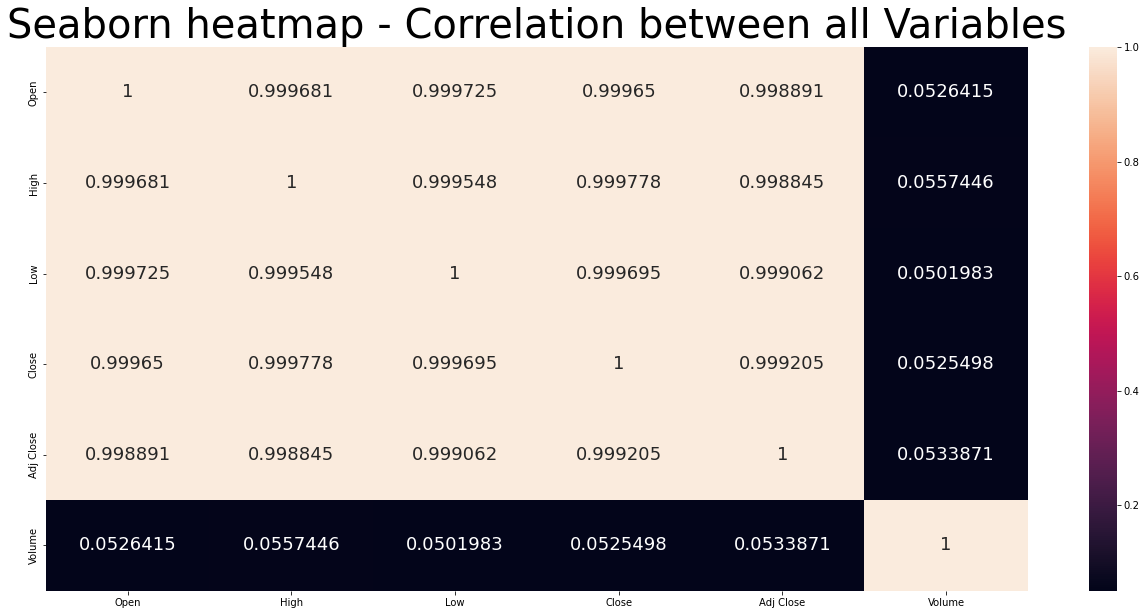

In [12]:
plt.figure(figsize=(22,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True,annot_kws={"size": 18}, fmt='g')
plt.title('Seaborn heatmap - Correlation between all Variables', fontsize = 40)


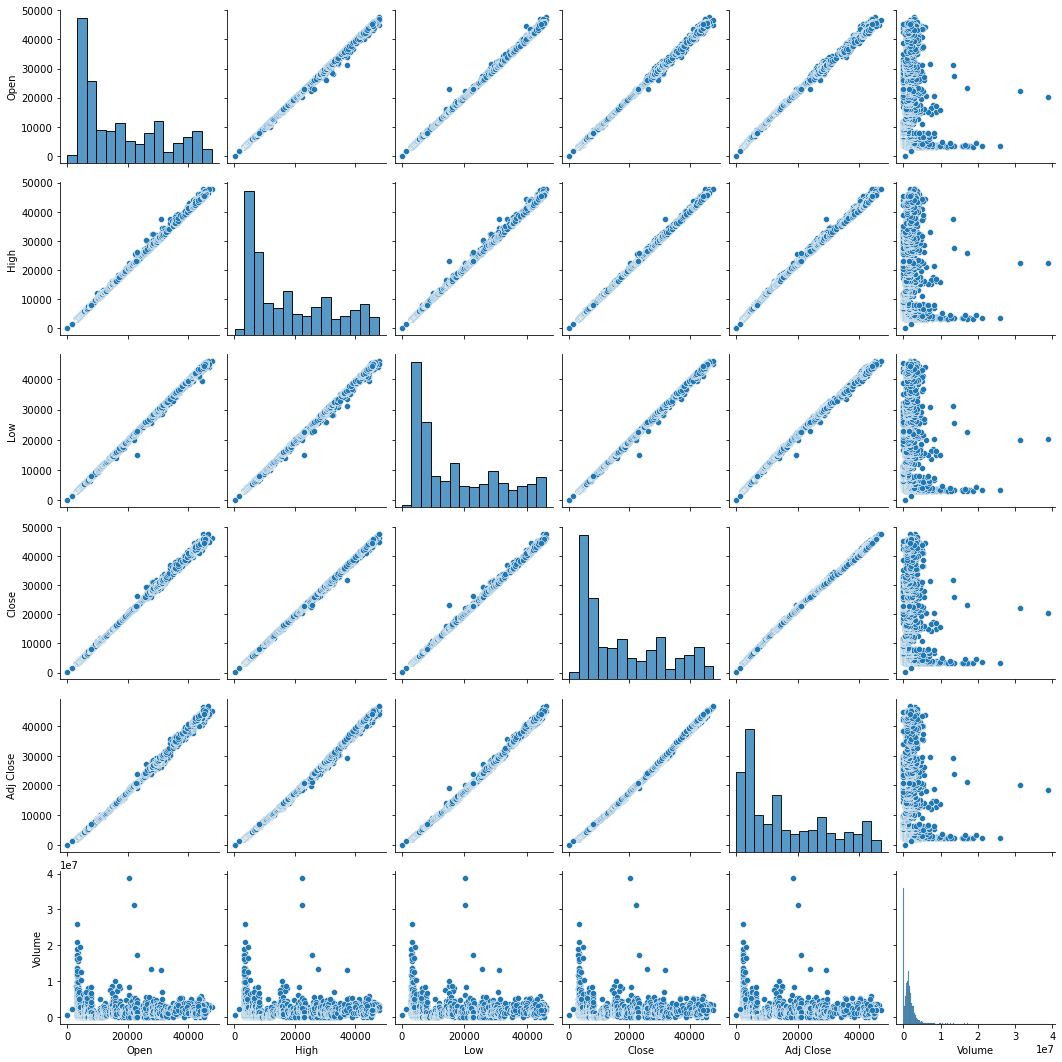

In [12]:
#Pair Grid
sns.pairplot(ff_dataset)

Some Graphs - using Full data set (ff_dataset)


In [13]:
columnnames =['Open', 'High', 'Low', 'Close', 'Adj Close']
#columnnames =list(ff_dataset.columns)

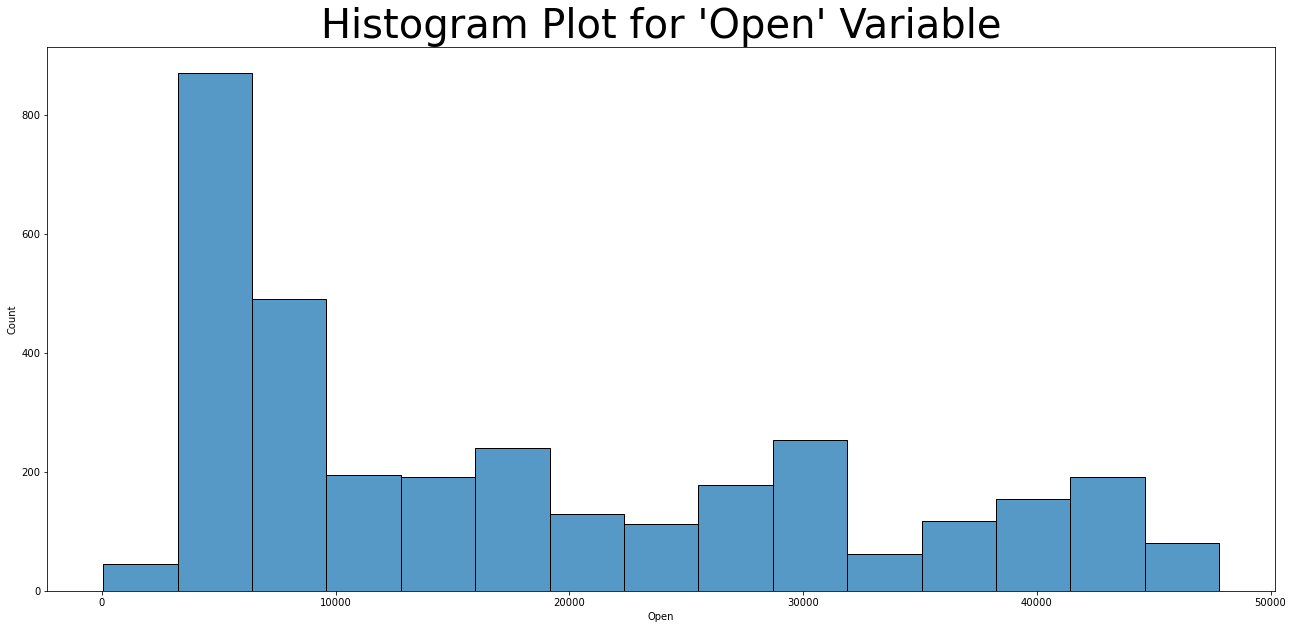

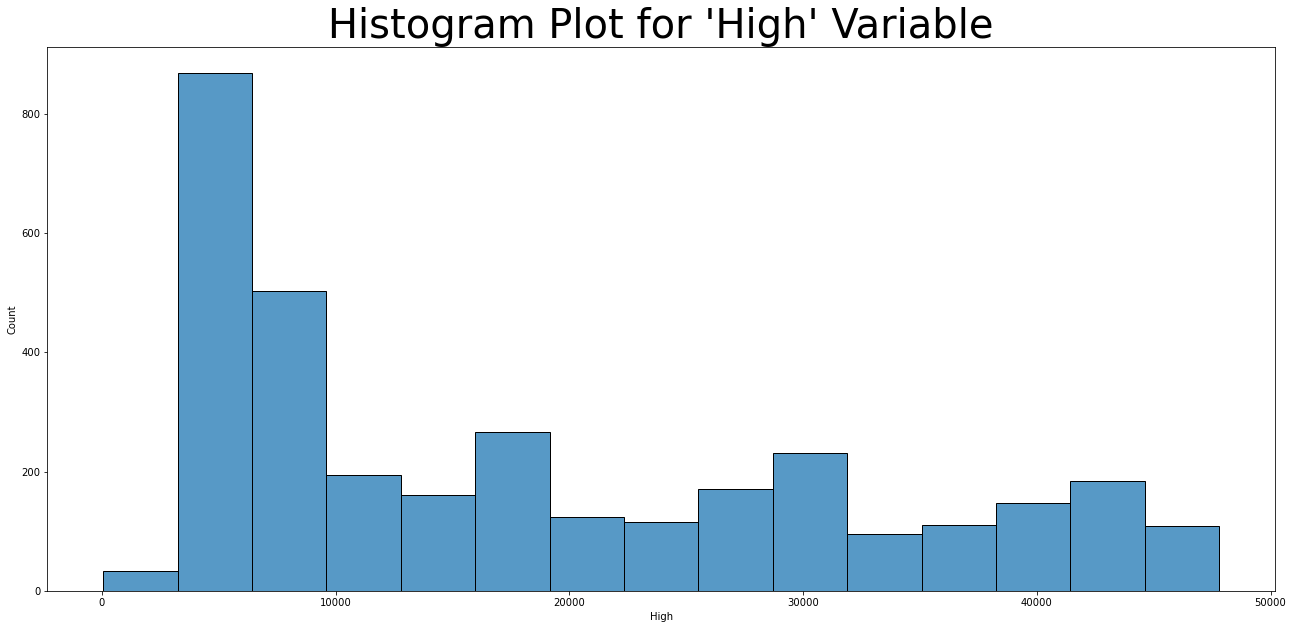

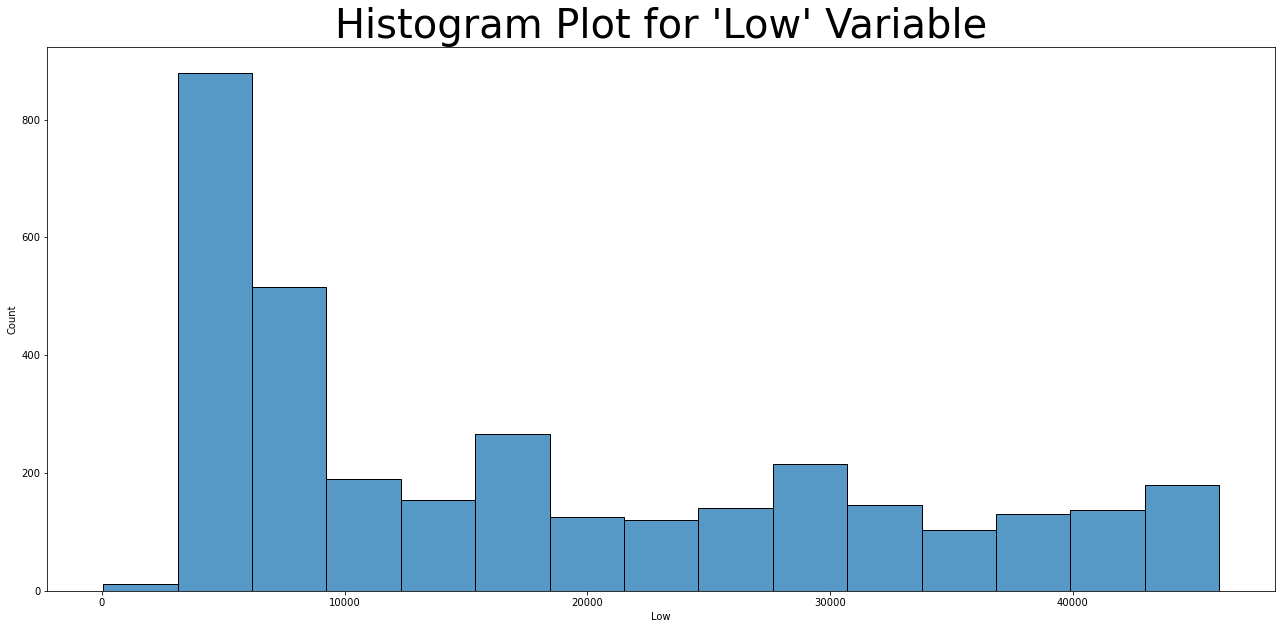

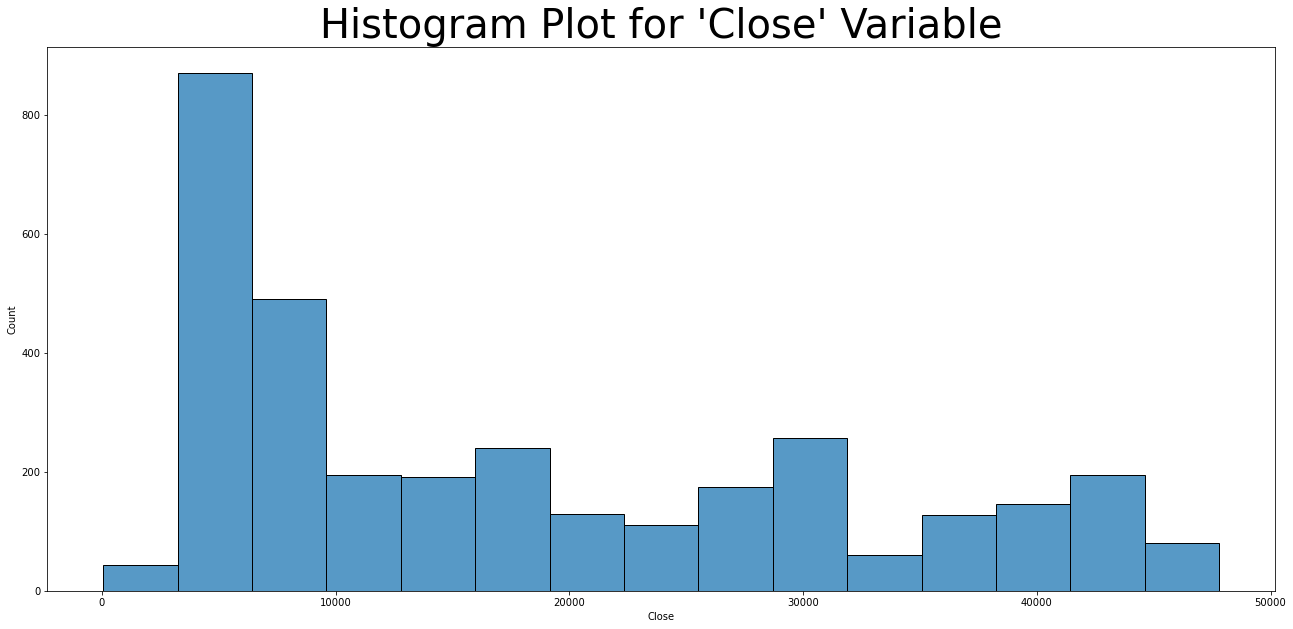

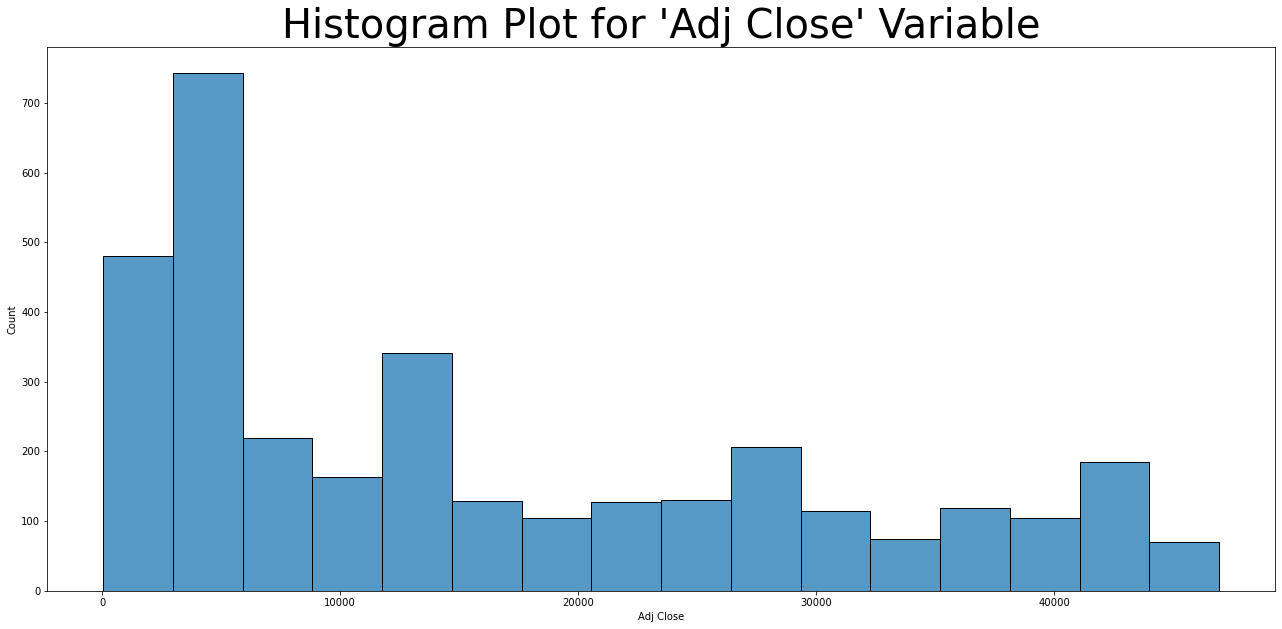

In [14]:
for columnname in columnnames:
    plt.figure(figsize=(22,10))
    sns.histplot(ff_dataset[columnname])
    plt.title("Histogram Plot for '"+ columnname+ "' Variable", fontsize = 40)
    plt.show()

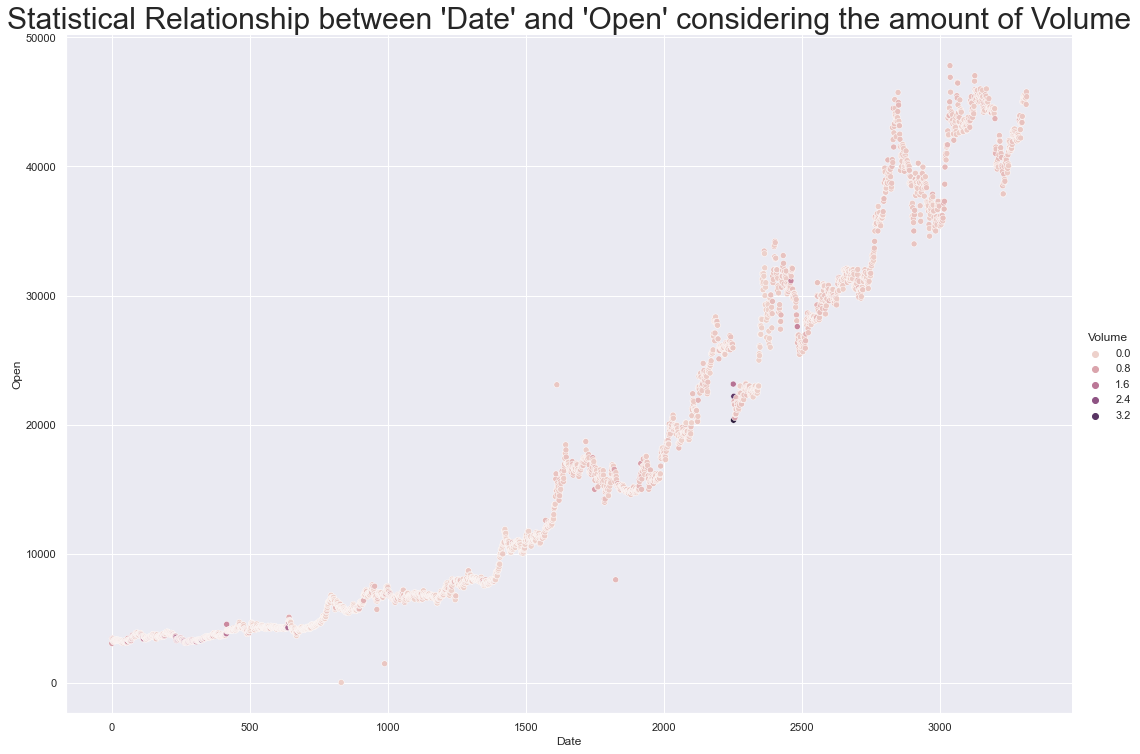

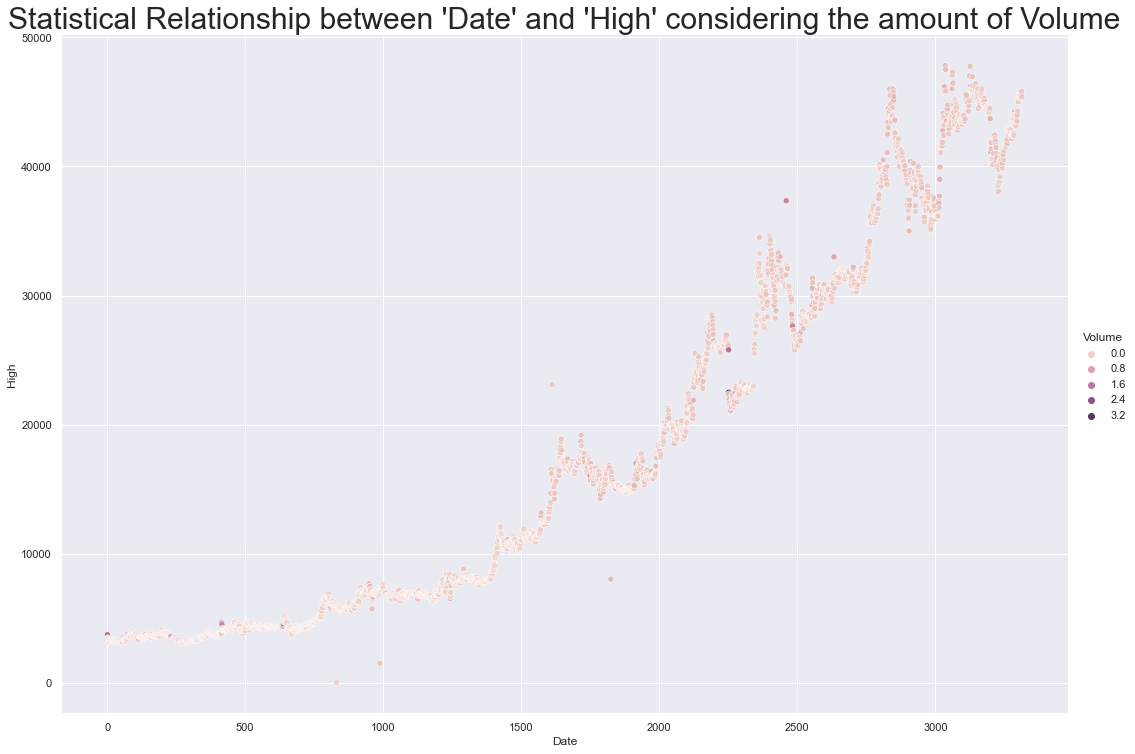

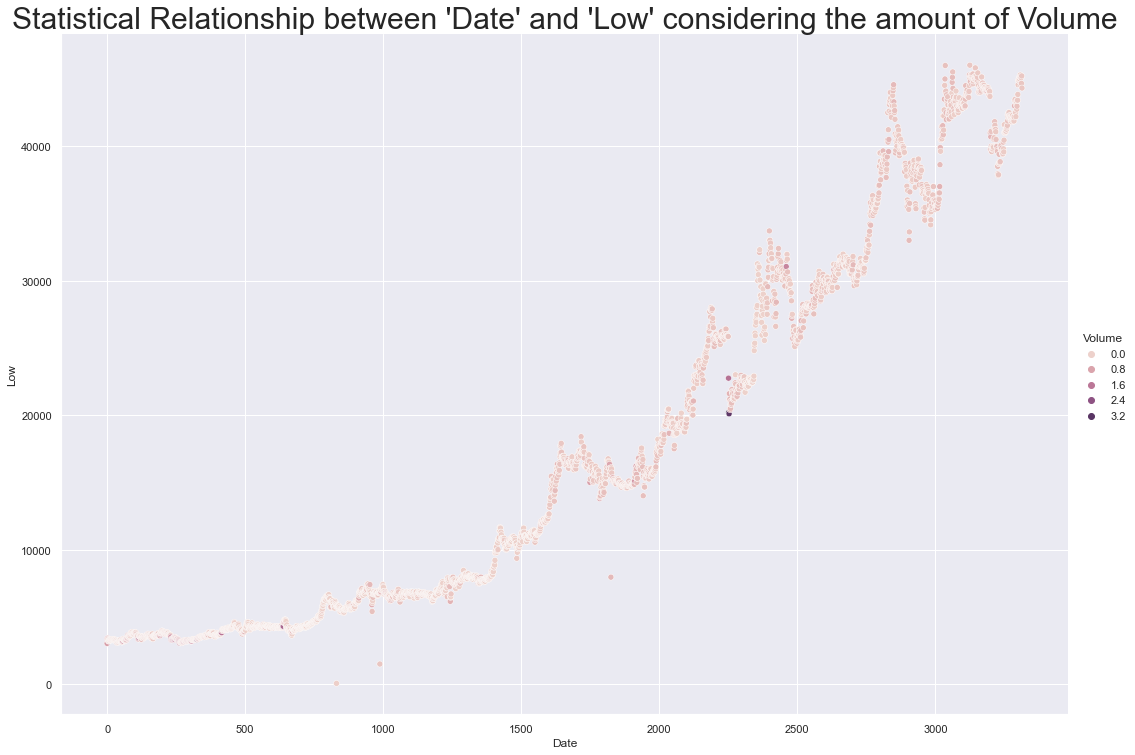

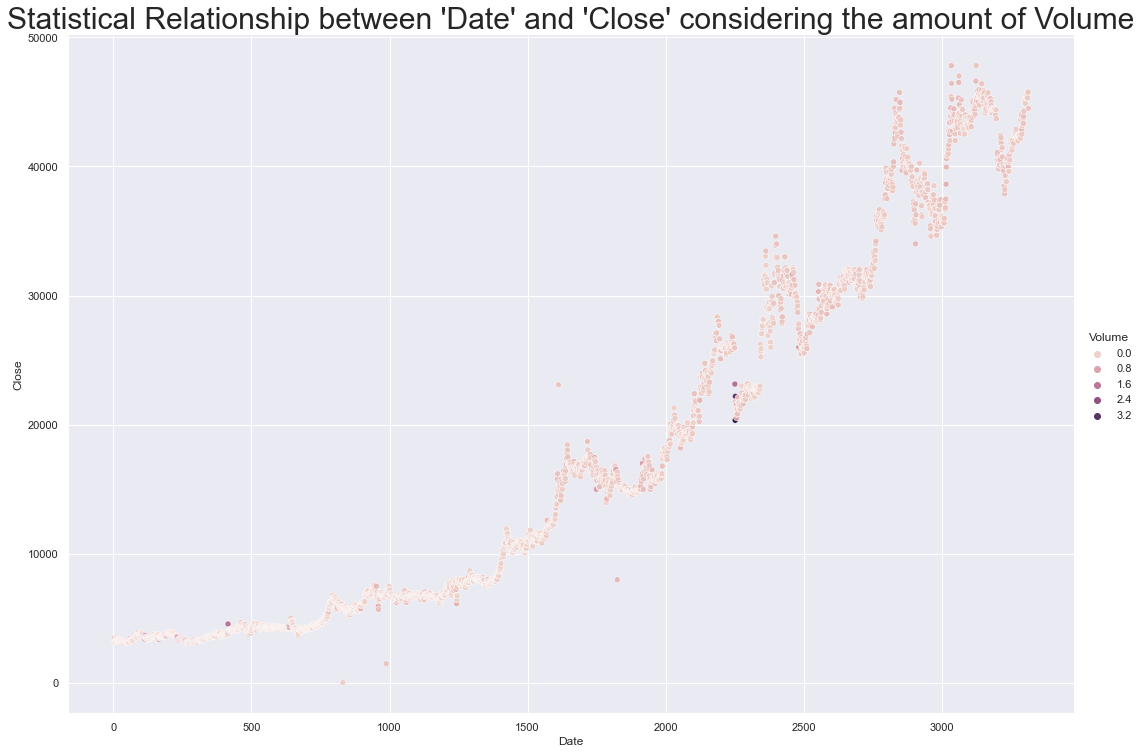

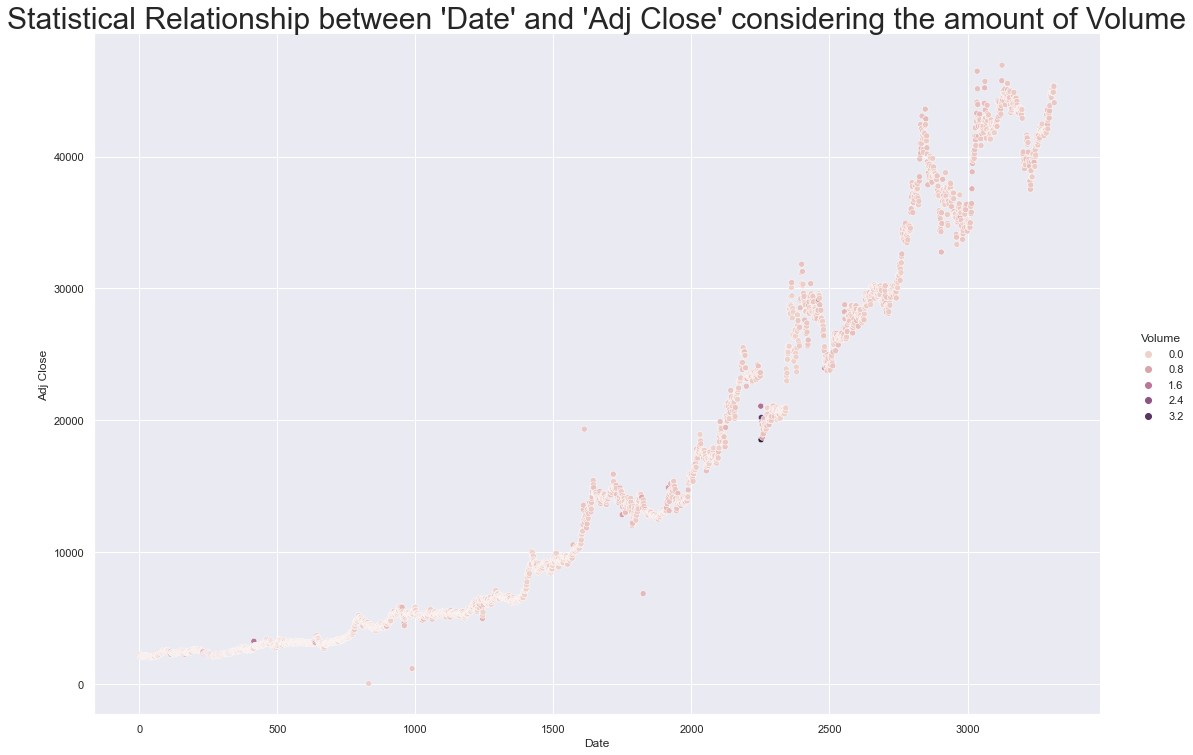

In [63]:
#plt.figure(figsize=(220,100))
for columnname in columnnames:
    sns.relplot(x='Date', y=columnname, hue='Volume', data=ff_dataset, height=10.27, aspect=10.7/7.27)
    plt.title("Statistical Relationship between 'Date' and '"+columnname+"' considering the amount of Volume", fontsize = 30)




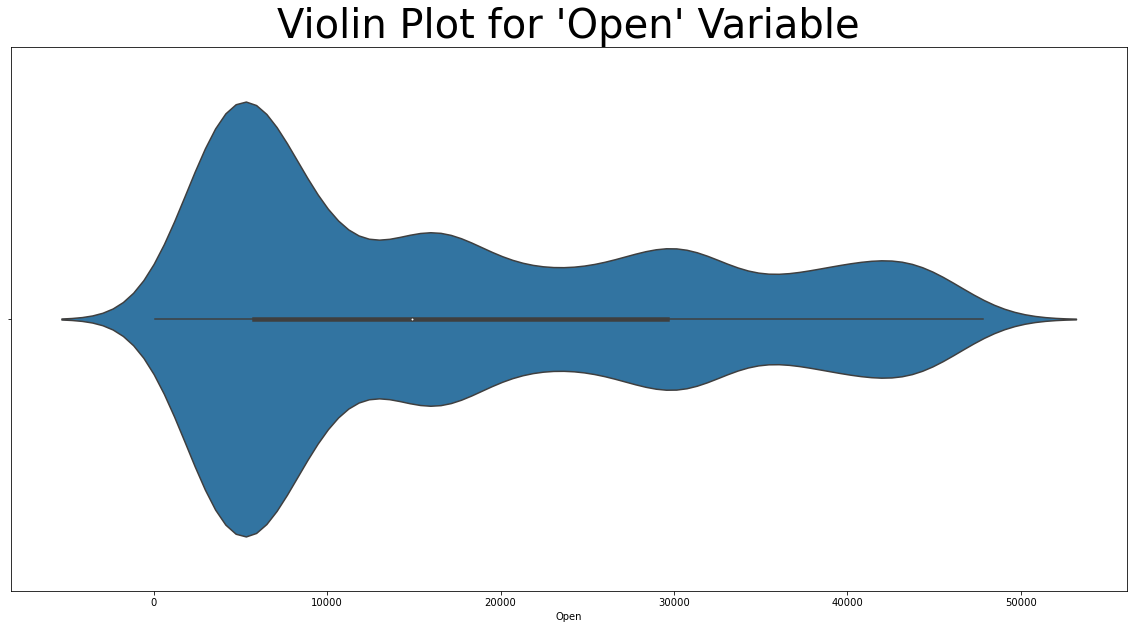

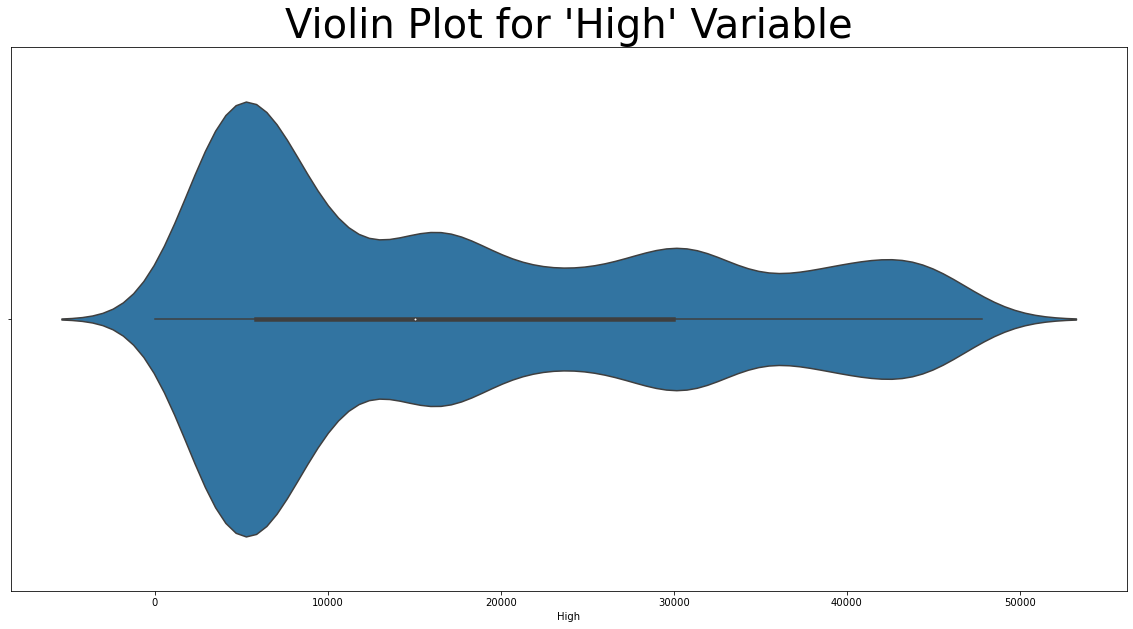

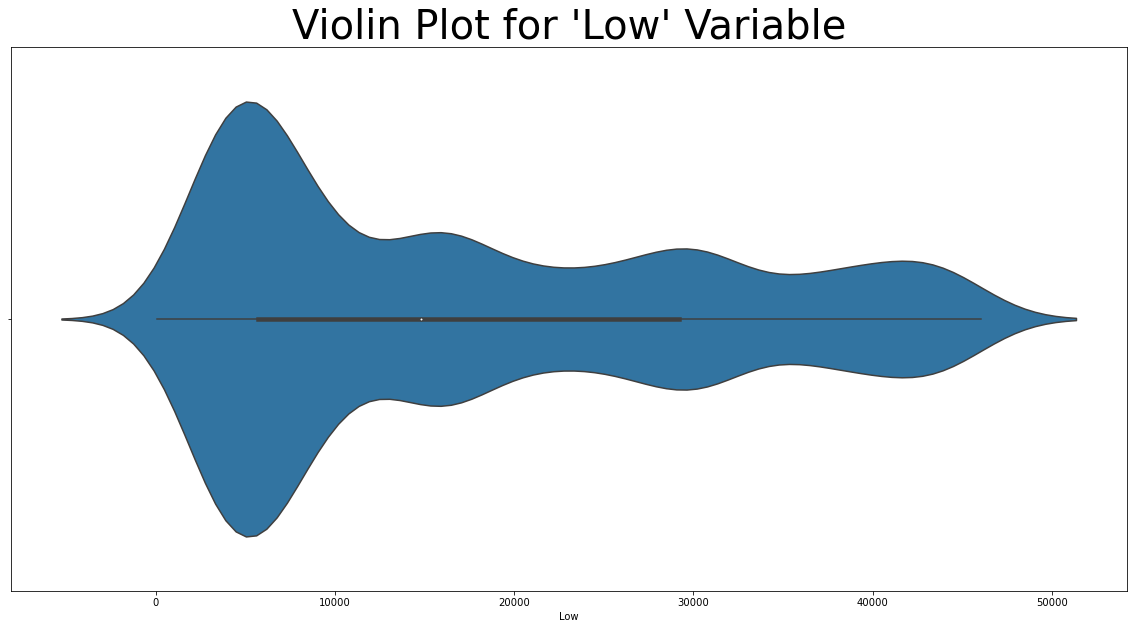

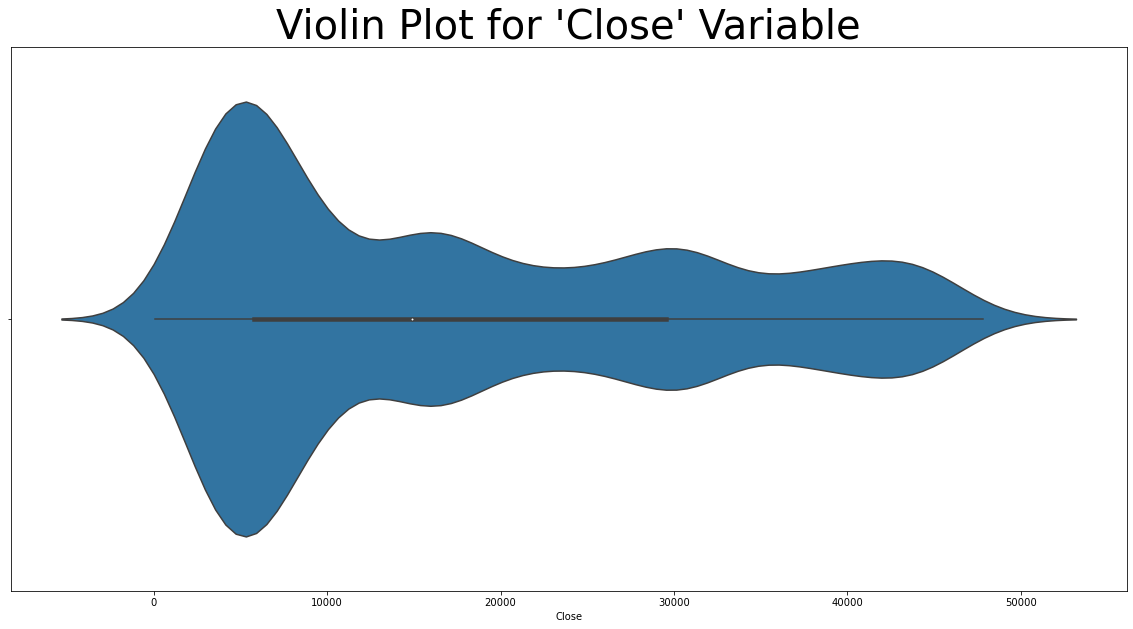

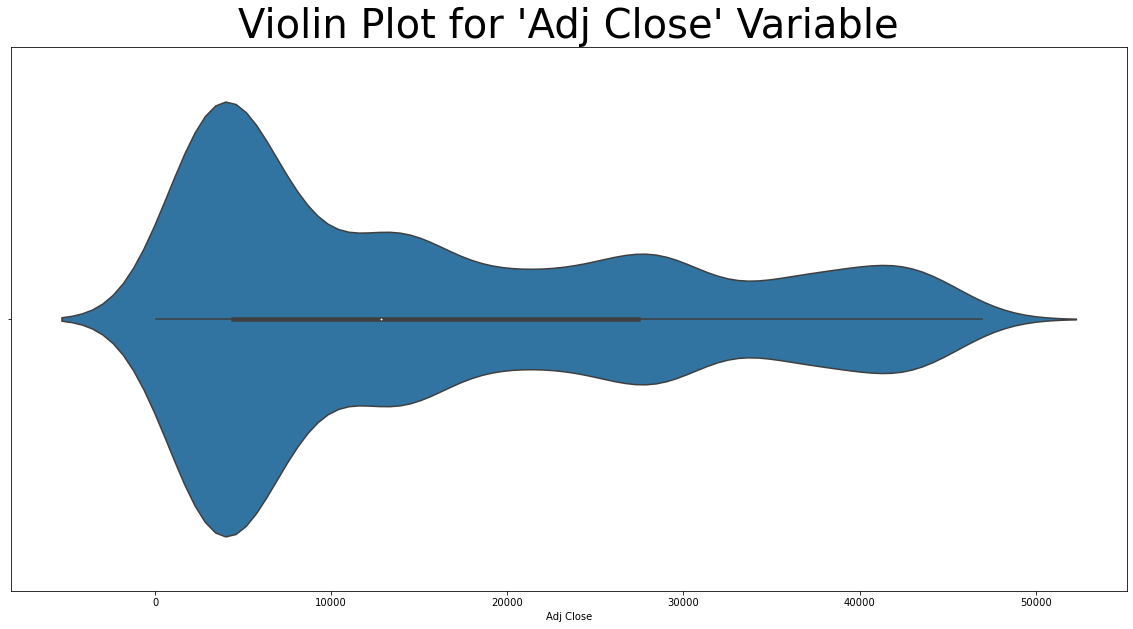

In [15]:
for columnname in columnnames:
  plt.figure(figsize=(20,10))
  sns.violinplot(x = columnname, data = ff_dataset)
  plt.title("Violin Plot for '"+ columnname+ "' Variable", fontsize = 40)
  plt.show()

In [16]:
volume = pd.DataFrame(ff_dataset.groupby("Volume").nunique().sort_values("Date", ascending=False).head())
#top_10

import plotly.express as px
segments = volume
fig = px.pie(segments, 
             values = volume["Volume"],
            names = volume.index,
            title = "Highest volume by Date",
            template = "seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

In [17]:
#Convert timestemps and dataset index
ff_dataset['Date'] = ff_dataset.index
ff_dataset.head()

Date    Open    High     Low   Close    Adj Close    Volume
0     0  3075.0  3375.0  3025.0  3375.0  2167.930664   8632500
1     1  3450.0  3750.0  3375.0  3425.0  2200.048096  16570000
2     2  3425.0  3500.0  3400.0  3450.0  2216.106934   4811000
3     3  3450.0  3450.0  3325.0  3400.0  2183.989990   3601500
4     4  3400.0  3400.0  3300.0  3325.0  2135.813477   2815000

Identifying and removing outliers from dataset

In [18]:
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

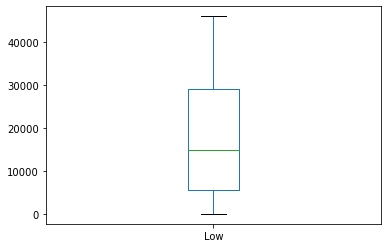

In [19]:
plot_boxplot(ff_dataset, "Low")

In [20]:
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3-Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
  return ls

In [21]:
index_list = []
for feature in ["Open", "High", "Low", "Close", "Adj Close","Volume"]:
  index_list.extend(outliers(ff_dataset, feature))

In [22]:
def remove(df, ls):
  ls=sorted(set(ls))
  df=df.drop(ls)
  return df

In [23]:
df_cleaned = remove(ff_dataset, index_list)
df_cleaned.head()

Date    Open    High     Low   Close    Adj Close   Volume
3     3  3450.0  3450.0  3325.0  3400.0  2183.989990  3601500
4     4  3400.0  3400.0  3300.0  3325.0  2135.813477  2815000
5     5  3300.0  3300.0  3200.0  3200.0  2055.519531  2838000
6     6  3200.0  3225.0  3200.0  3200.0  2055.519531  1417500
7     7  3225.0  3350.0  3225.0  3300.0  2119.754150  3078500

In [24]:
#dropping data column to not being incompatible with some processes
df_cleaned.drop('Date', axis=1, inplace=True)

In [25]:
df_cleaned.shape

(3170, 6)

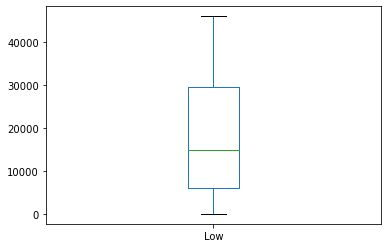

In [26]:
plot_boxplot(df_cleaned, 'Low')

In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3170 entries, 3 to 3314
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3170 non-null   float64
 1   High       3170 non-null   float64
 2   Low        3170 non-null   float64
 3   Close      3170 non-null   float64
 4   Adj Close  3170 non-null   float64
 5   Volume     3170 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 173.4 KB


Text(0.5, 1.0, 'Scatterplot comparing incidences of High against Low from dataset without outliers')

<Figure size 576x288 with 0 Axes>

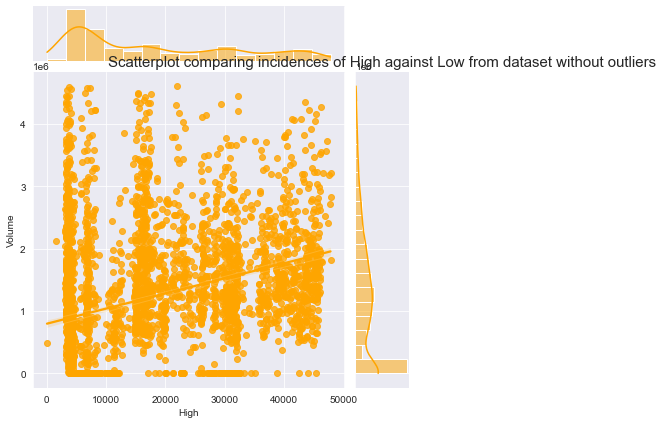

In [28]:
#Scatterplot comparing incidences of High against Low from dataset without outliers
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot (x='High', y='Volume', data=df_cleaned, kind='reg', color='orange')
plt.title('Scatterplot comparing incidences of High against Low from dataset without outliers', fontsize = 15)

Text(0.5, 1.0, 'Pair Grid for dataset (without outliers)')

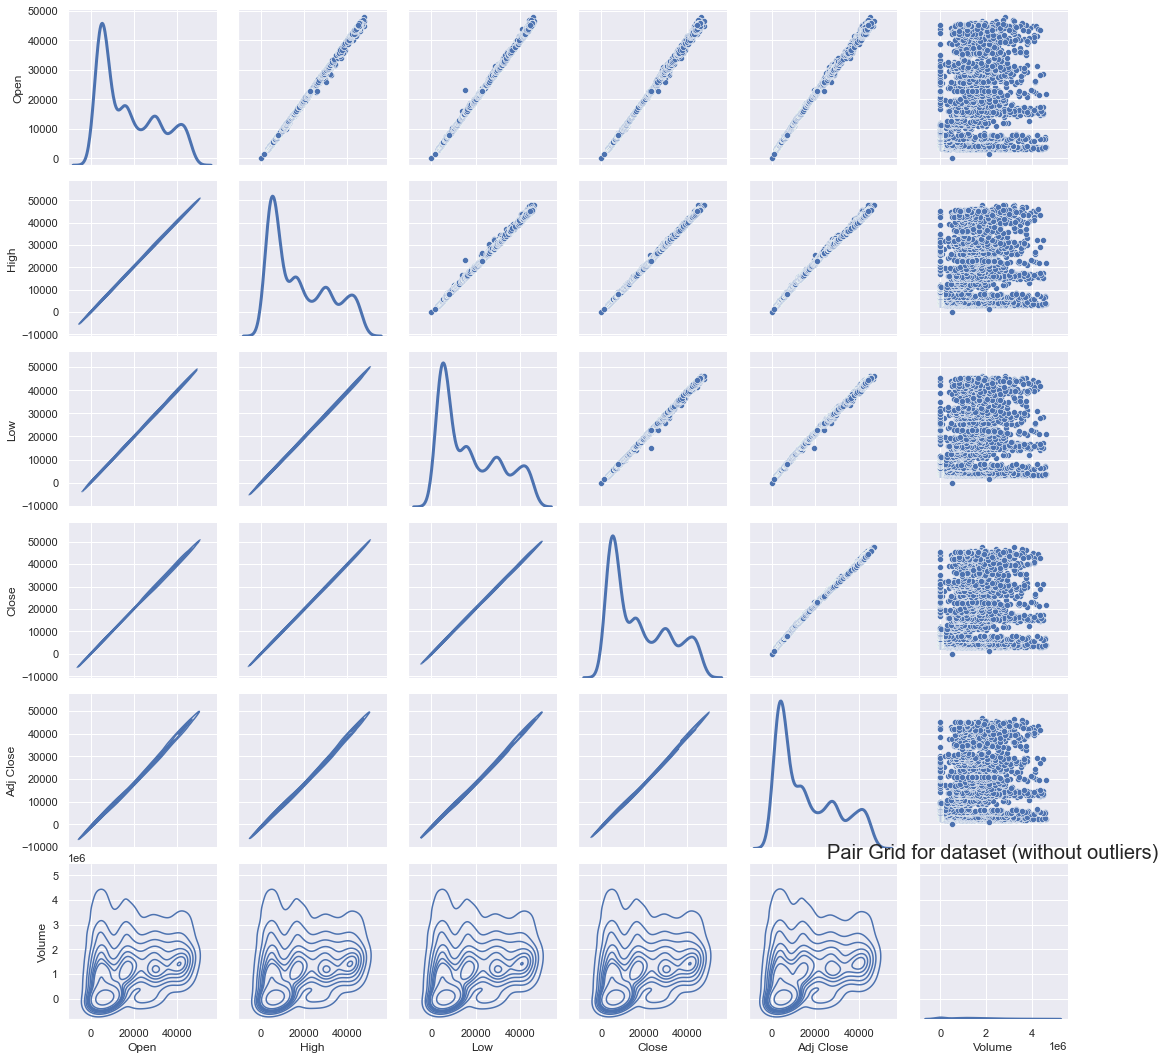

In [92]:
g = sns.PairGrid(df_cleaned)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.title("Pair Grid for dataset (without outliers)", fontsize = 20)

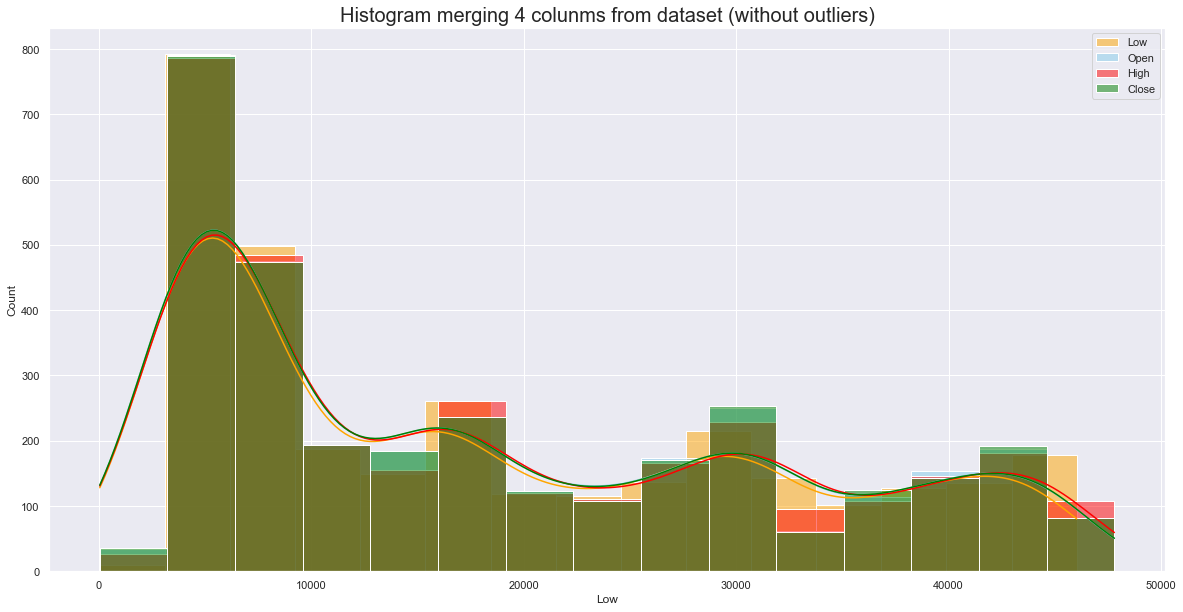

In [29]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.histplot(data=df_cleaned, x="Low", color="orange", label="Low", kde=True)
sns.histplot(data=df_cleaned, x="Open", color="skyblue", label="Open", kde=True)
sns.histplot(data=df_cleaned, x="High", color="red", label="High", kde=True)
sns.histplot(data=df_cleaned, x="Close", color="green", label="Close", kde=True)
plt.title("Histogram merging 4 colunms from dataset (without outliers)", fontsize = 20)
plt.legend() 
plt.show()

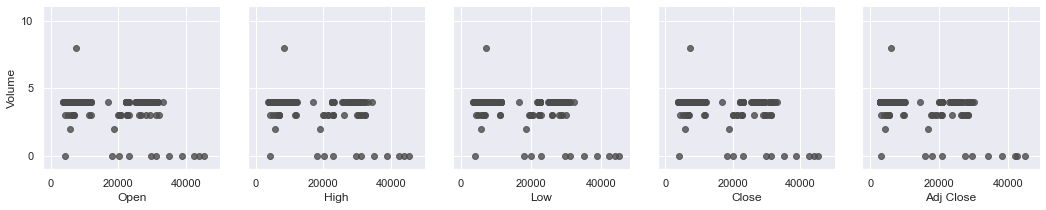

In [30]:
g = sns.PairGrid(df_cleaned, y_vars=["Volume"], x_vars=["Open", "High", "Low", "Close", "Adj Close"], height=3)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10])

In [31]:
df_cleaned.head

<bound method NDFrame.head of          Open     High      Low    Close     Adj Close   Volume
3      3450.0   3450.0   3325.0   3400.0   2183.989990  3601500
4      3400.0   3400.0   3300.0   3325.0   2135.813477  2815000
5      3300.0   3300.0   3200.0   3200.0   2055.519531  2838000
6      3200.0   3225.0   3200.0   3200.0   2055.519531  1417500
7      3225.0   3350.0   3225.0   3300.0   2119.754150  3078500
...       ...      ...      ...      ...           ...      ...
3310  45300.0  45600.0  44500.0  45525.0  45093.214844  1210200
3311  45525.0  45525.0  45100.0  45300.0  44870.351563  1216000
3312  44800.0  45800.0  44675.0  45800.0  45365.609375  2002300
3313  45775.0  45800.0  45225.0  45750.0  45316.082031  1966800
3314  45400.0  45400.0  44325.0  44500.0  44077.937500  1896100

[3170 rows x 6 columns]>

Finished outliers process

Data Normalization


[[9.57932304e-04 9.57932304e-04 9.23224612e-04 9.44049227e-04
  6.06410018e-04 9.99998027e-01]
 [1.20781149e-03 1.20781149e-03 1.17228763e-03 1.18116859e-03
  7.58723548e-04 9.99996869e-01]
 [1.16278734e-03 1.16278734e-03 1.12755136e-03 1.12755136e-03
  7.24282452e-04 9.99997114e-01]
 ...
 [2.23457058e-02 2.28444939e-02 2.22833573e-02 2.28444939e-02
  2.26278250e-02 9.98723366e-01]
 [2.32426679e-02 2.32553619e-02 2.29634005e-02 2.32299740e-02
  2.30096482e-02 9.98660389e-01]
 [2.39106207e-02 2.39106207e-02 2.33444551e-02 2.34366216e-02
  2.32143357e-02 9.98610745e-01]]
3170


Text(0.5, 1.0, 'Data Normalization for dataset (without outliers)')

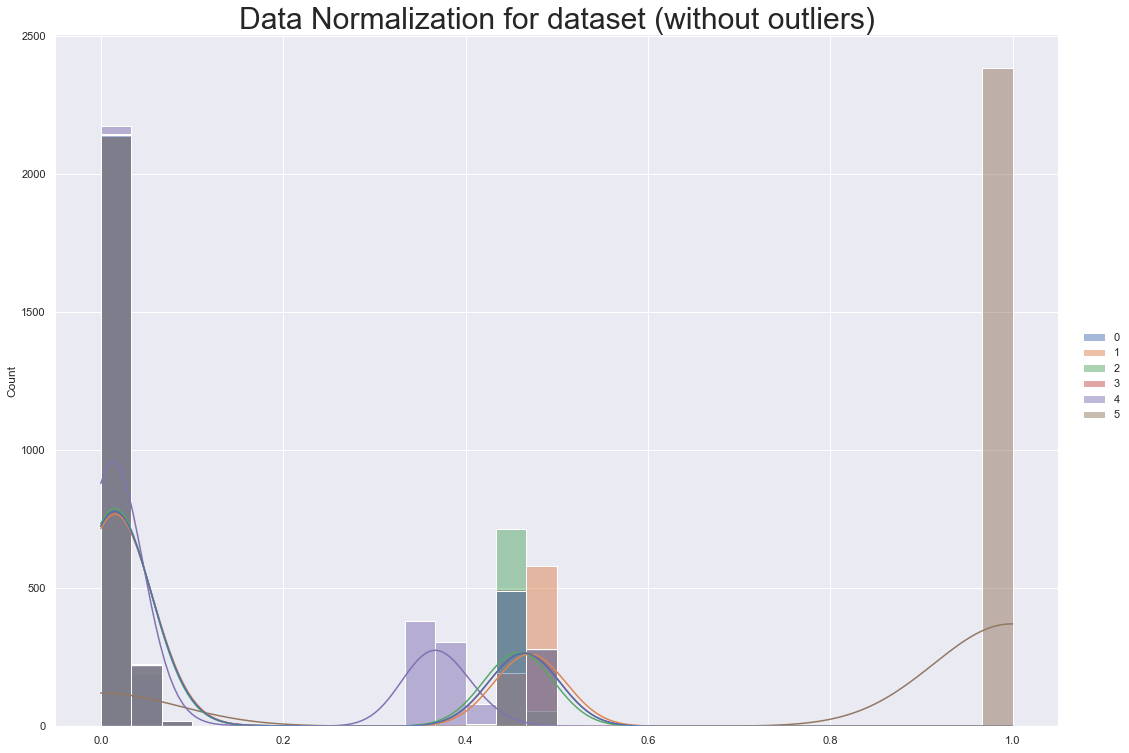

In [38]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()

Norm = scaler.fit_transform(df_cleaned)

print(Norm)
print(len(Norm))

sns.displot(Norm, kde=True, height=10.27, aspect=10.7/7.27)
plt.title("Data Normalization for dataset (without outliers)", fontsize = 30)

Min Max Scaler

[[0.07122364 0.07120419 0.07125457 0.07017654 0.04578212 0.78216962]
 [0.07017654 0.07015707 0.07071081 0.06860589 0.04475466 0.61135845]
 [0.06808234 0.06806283 0.06853576 0.06598815 0.04304222 0.61635357]
 ...
 [0.93717409 0.95811518 0.97063685 0.95811606 0.96671824 0.4348572 ]
 [0.95759251 0.95811518 0.98259962 0.95706896 0.96566197 0.42714736]
 [0.94973927 0.94973822 0.96302419 0.9308915  0.93925601 0.41179281]]


Text(0.5, 1.0, 'Min Max Scaler for dataset (without outliers)')

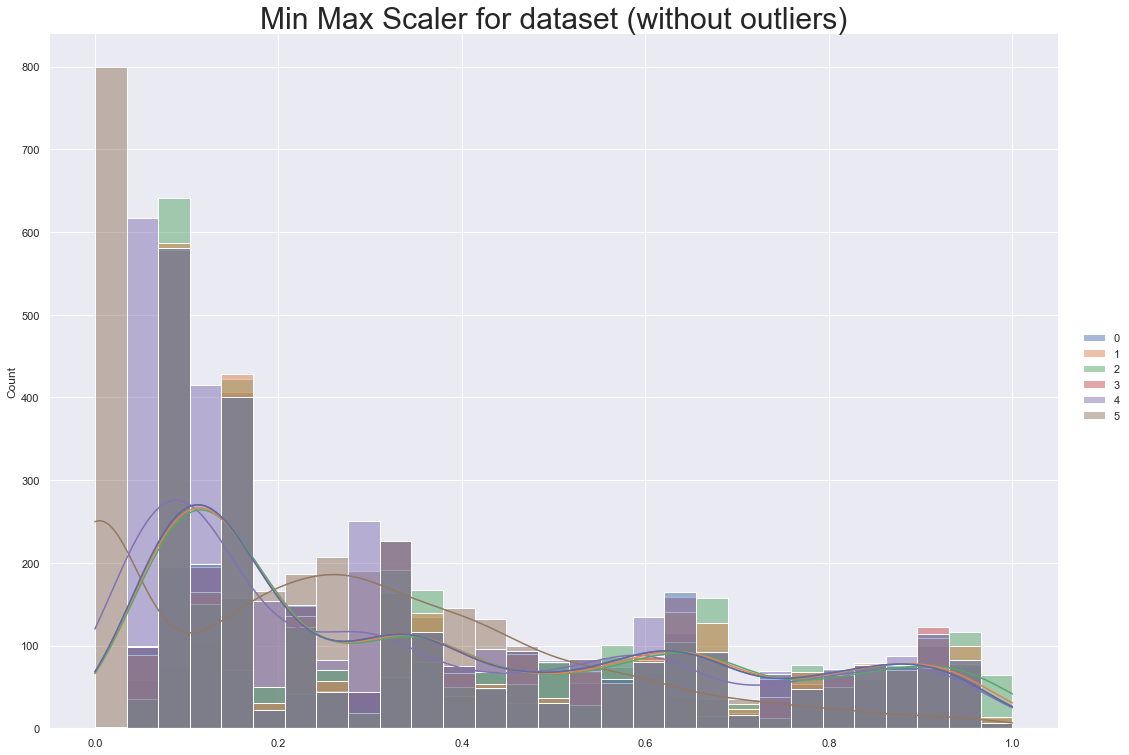

In [33]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
MMscaled = scaler.fit_transform(df_cleaned)
print(MMscaled)
sns.displot(MMscaled, kde=True, height=10.27, aspect=10.7/7.27)
plt.title("Min Max Scaler for dataset (without outliers)", fontsize = 30)

Data standardization

[[-1.07877085 -1.08308798 -1.08407879 -1.08254274 -1.05506776  2.20026494]
 [-1.08244552 -1.08672441 -1.08593663 -1.08805134 -1.05861409  1.46702162]
 [-1.08979487 -1.09399728 -1.09336796 -1.09723233 -1.06452463  1.48846421]
 ...
 [ 1.96018202  1.99697044  1.98877725  2.0316503   2.12358654  0.70935239]
 [ 2.0318381   1.99697044  2.02964957  2.02797791  2.11994076  0.67625622]
 [ 2.00427807  1.96787898  1.96276758  1.93616797  2.02879936  0.61034357]]


Text(0.5, 1.0, 'Data standardization for dataset (without outliers)')

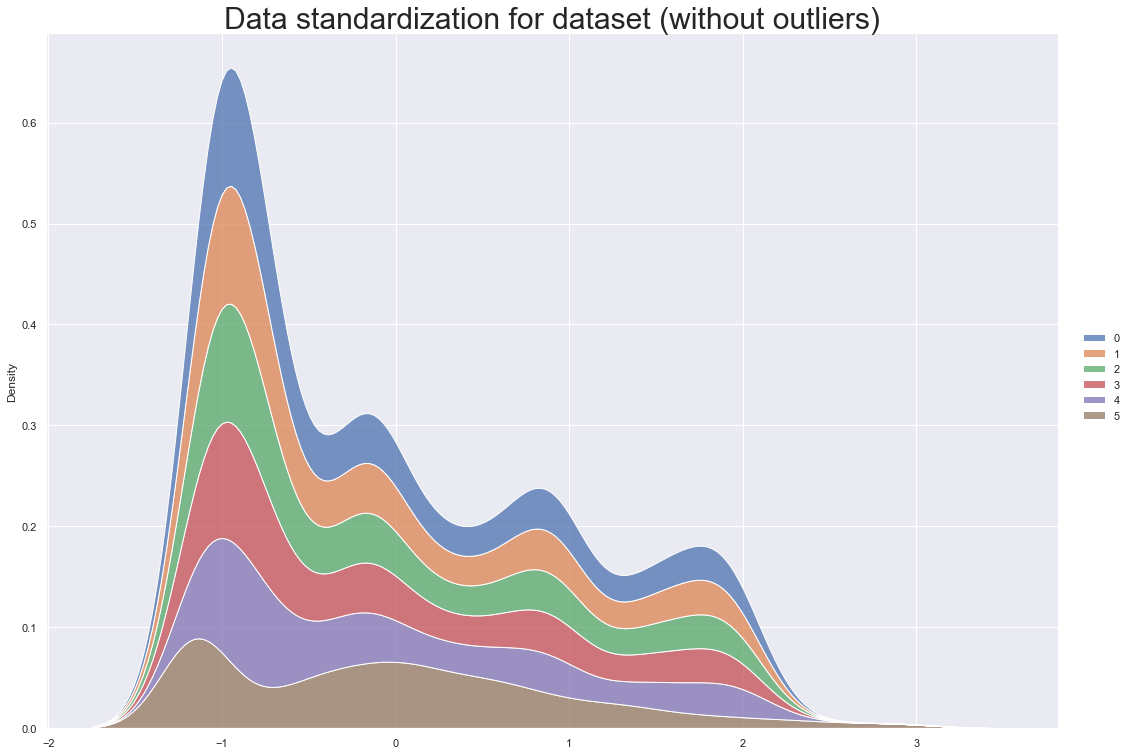

In [34]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
Sscaled = scaler.fit_transform(df_cleaned)
print(Sscaled)
sns.displot(Sscaled, kind="kde", multiple="stack", height=10.27, aspect=10.7/7.27)
plt.title("Data standardization for dataset (without outliers)", fontsize = 30)


Robust Scaler

[[-0.49328063 -0.49426486 -0.49745921 -0.49591137 -0.47244534  1.38861618]
 [-0.49538867 -0.49635036 -0.49852902 -0.49907676 -0.47454038  0.94228641]
 [-0.49960474 -0.50052138 -0.50280824 -0.50435241 -0.47803212  0.95533865]
 ...
 [ 1.25006588  1.2721585   1.27199786  1.29359008  1.4053894   0.48108844]
 [ 1.2911726   1.2721585   1.29553357  1.29147982  1.40323561  0.4609426 ]
 [ 1.27536232  1.25547445  1.25702059  1.23872329  1.34939254  0.42082116]]


Text(0.5, 1.0, 'Robust Scaler for dataset (without outliers)')

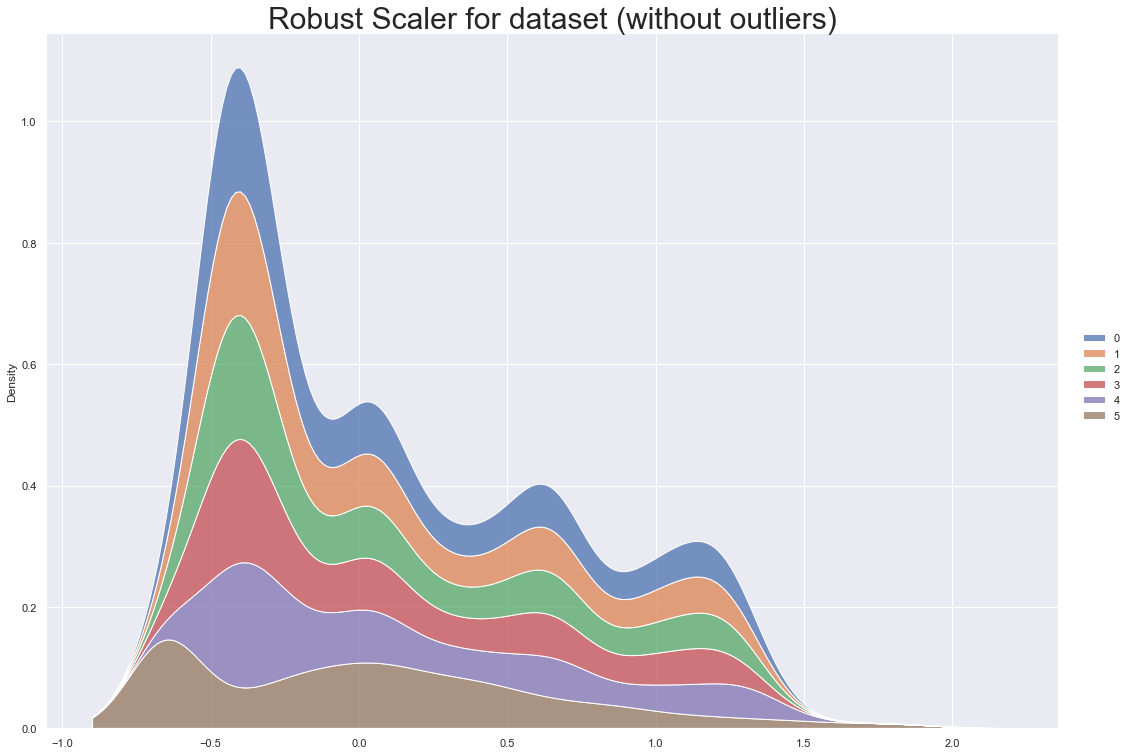

In [35]:
# Robust Scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(df_cleaned)
Rscaler = scaler.transform(df_cleaned)
print(Rscaler)
sns.displot(Rscaler, kind="kde", multiple="stack", height=10.27, aspect=10.7/7.27)
plt.title("Robust Scaler for dataset (without outliers)", fontsize = 30)

Text(0.5, 1.0, 'Data Normalization for dataset (without outliers)')

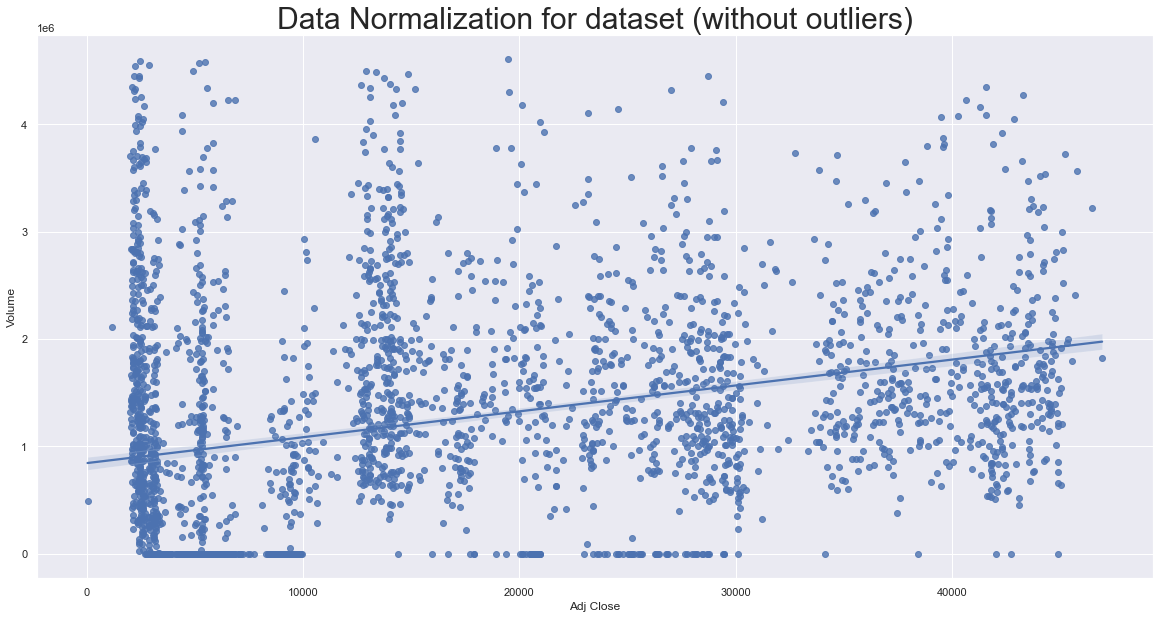

In [36]:
plt.figure(figsize=(20,10))
ax = sns.regplot(x="Adj Close", y="Volume", data=df_cleaned)
plt.title("Data Normalization for dataset (without outliers)", fontsize = 30)

Function for Model Evaluation


In [108]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(6,6)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')

Pre Processing, defining Train and Test
Also checking dimension

In [40]:
X = ff_dataset.drop('Open', axis = 1)
y = ff_dataset['Open']
X.shape

(3315, 6)

In [41]:
y.shape

(3315,)

In [42]:
#Train size 80%, test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
X_train.shape


(2652, 6)

In [44]:
y_train.shape

(2652,)

In [45]:
X_test.shape

(663, 6)

In [46]:
y_test.shape

(663,)

References

https://www.stackvidhya.com/how-to-add-header-to-pandas-dataframe/;
https://www.addoptics.nl/optics-explained/refractive-index/
https://analyticsindiamag.com/exploring-dataprep-a-python-library-for-data-preparation-eda/#:~:text=DataPrep%20is%20an%20open%2Dsource,solved%20and%20taken%20care%20of.
https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
https://dzone.com/articles/python-class-attributes-vs-instance-attributes#:~:text=A%20class%20attribute%20is%20a,.)%20%2C%20of%20the%20class.
https://machinelearningmastery.com/difference-test-validation-datasets/
https://stringfixer.com/pt/Training_data
https://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html
https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
https://baipureddyneeraj.medium.com/glass-classification-using-various-machine-learning-techniques-cf268fd520d6
https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html
https://community.developers.refinitiv.com/questions/71300/python-time-series-convert-date-index-to-pandas-co.html
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
https://moonbooks.org/Articles/How-to-increase-the-size-of-the-cells-text-annotations-of-a-seaborn-heatmap-in-python-/
https://seaborn.pydata.org/generated/seaborn.violinplot.html
https://deepnote.com/@econdesousa/ViolinPlotvsBoxPlot-aadf0c53-53b4-4221-89b9-4388c54c68bd
https://stackabuse.com/seaborn-violin-plot-tutorial-and-examples/
https://seaborn.pydata.org/tutorial/distributions.html
https://seaborn.pydata.org/tutorial/relational.html